In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score


In [2]:
df = pd.read_csv('MLF_GP1_CreditScore.csv')

In [3]:
df.head()

,Sales/Revenues,Gross Margin,EBITDA,EBITDA Margin,Net Income Before Extras,Total Debt,Net Debt,LT Debt,ST Debt,Cash,...,Interest Coverage,Total Liquidity,Current Liquidity,Current Liabilities,EPS Before Extras,PE,ROA,ROE,InvGrd,Rating
0,-0.005496,0.030763,0.018885,0.024515,0.146849,-0.029710,-0.019296,-0.042648,0.049875,-0.133716,...,0.136748,0.392143,-0.184887,0.062781,0.148305,0.100409,0.163266,0.102521,1,A1
1,-0.005496,0.030763,0.088716,0.094733,0.146849,-0.029710,-0.019296,-0.042648,0.049875,-0.133716,...,0.214657,0.392143,-0.184887,0.062781,0.148305,-0.089598,0.163266,0.102521,1,A1
2,-0.007045,0.023159,0.088716,0.096440,0.108590,0.039410,0.034268,0.009059,0.250371,0.101315,...,0.205290,0.483257,-0.017877,0.121357,0.110656,-0.045142,0.105711,0.103378,1,A1
3,-0.009396,0.028400,0.088716,0.099046,0.146137,0.030071,0.036938,-0.016964,0.356994,-0.052606,...,0.232991,0.996955,-0.122017,0.079051,0.151639,-0.008231,0.162421,0.132295,1,A1
4,-0.009009,0.027714,0.088716,0.098611,0.123500,0.024224,0.034445,-0.034132,0.461894,-0.090869,...,0.172906,1.711426,-0.161561,0.084319,0.130435,0.015528,0.156427,0.225144,1,A1


In [4]:
df.columns

Index(['Sales/Revenues', 'Gross Margin', 'EBITDA', 'EBITDA Margin',
       'Net Income Before Extras', 'Total Debt', 'Net Debt', 'LT Debt',
       'ST Debt', 'Cash', 'Free Cash Flow', 'Total Debt/EBITDA',
       'Net Debt/EBITDA', 'Total MV', 'Total Debt/MV', 'Net Debt/MV',
       'CFO/Debt', 'CFO', 'Interest Coverage', 'Total Liquidity',
       'Current Liquidity', 'Current Liabilities', 'EPS Before Extras', 'PE',
       'ROA', 'ROE', 'InvGrd', 'Rating'],
      dtype='object')

In [5]:
print(len(df['Rating'].unique()))

16


In [6]:
df.describe()

,Sales/Revenues,Gross Margin,EBITDA,EBITDA Margin,Net Income Before Extras,Total Debt,Net Debt,LT Debt,ST Debt,Cash,...,CFO,Interest Coverage,Total Liquidity,Current Liquidity,Current Liabilities,EPS Before Extras,PE,ROA,ROE,InvGrd
count,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,...,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000
mean,0.050378,0.026007,0.068718,0.021074,0.123026,0.822405,-0.419810,1.255168,3.142797,0.466620,...,-0.189317,0.298785,-0.855714,0.436002,0.072802,0.032196,0.497705,0.019394,-0.217604,0.757059
std,0.161910,0.273768,0.237365,0.189025,14.475689,13.317075,28.385702,16.224453,51.986550,1.859494,...,5.668669,5.265291,22.926862,1.904282,0.266471,6.151994,12.102502,14.594193,15.389000,0.428986
min,-0.661715,-0.794722,-0.782254,-0.805153,-289.000000,-0.903014,-493.305578,-0.921515,-0.997692,-0.990982,...,-161.609425,-0.991976,-502.000000,-0.994141,-0.684678,-96.250000,-59.795133,-305.462167,-373.837267,0.000000
25%,-0.005693,-0.020028,-0.022640,-0.042771,-0.158478,-0.076316,-0.120725,-0.094767,-0.337959,-0.195117,...,-0.115159,-0.096996,-0.857013,-0.227327,-0.072734,-0.152894,-0.293521,-0.208483,-0.233955,1.000000
50%,0.034000,0.003403,0.049482,0.011134,0.056627,0.005886,-0.003060,-0.002078,0.043092,0.075820,...,0.046983,0.043216,-0.229098,0.040446,0.041785,0.066027,-0.040405,-0.009403,-0.020392,1.000000
75%,0.083004,0.025595,0.124533,0.060566,0.222219,0.136449,0.160251,0.174735,0.649475,0.483113,...,0.216432,0.177340,0.512778,0.416067,0.161215,0.236046,0.168897,0.156136,0.201596,1.000000
max,2.277229,3.202713,3.542425,4.141182,478.280075,281.604237,865.194595,289.388178,2038.000000,36.980037,...,13.005788,182.131887,280.138728,34.372455,4.194381,187.000000,381.243282,474.847172,343.145356,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Sales/Revenues            1700 non-null   float64
 1   Gross Margin              1700 non-null   float64
 2   EBITDA                    1700 non-null   float64
 3   EBITDA Margin             1700 non-null   float64
 4   Net Income Before Extras  1700 non-null   float64
 5   Total Debt                1700 non-null   float64
 6   Net Debt                  1700 non-null   float64
 7   LT Debt                   1700 non-null   float64
 8   ST Debt                   1700 non-null   float64
 9   Cash                      1700 non-null   float64
 10  Free Cash Flow            1700 non-null   float64
 11  Total Debt/EBITDA         1700 non-null   float64
 12  Net Debt/EBITDA           1700 non-null   float64
 13  Total MV                  1700 non-null   float64
 14  Total De

In [8]:
df.isnull().sum()

Sales/Revenues              0
Gross Margin                0
EBITDA                      0
EBITDA Margin               0
Net Income Before Extras    0
Total Debt                  0
Net Debt                    0
LT Debt                     0
ST Debt                     0
Cash                        0
Free Cash Flow              0
Total Debt/EBITDA           0
Net Debt/EBITDA             0
Total MV                    0
Total Debt/MV               0
Net Debt/MV                 0
CFO/Debt                    0
CFO                         0
Interest Coverage           0
Total Liquidity             0
Current Liquidity           0
Current Liabilities         0
EPS Before Extras           0
PE                          0
ROA                         0
ROE                         0
InvGrd                      0
Rating                      0
dtype: int64

In [9]:
df.select_dtypes(include=['object']).columns.tolist()

['Rating']

In [10]:
df.select_dtypes(exclude=['object']).columns.tolist()

['Sales/Revenues',
 'Gross Margin',
 'EBITDA',
 'EBITDA Margin',
 'Net Income Before Extras',
 'Total Debt',
 'Net Debt',
 'LT Debt',
 'ST Debt',
 'Cash',
 'Free Cash Flow',
 'Total Debt/EBITDA',
 'Net Debt/EBITDA',
 'Total MV',
 'Total Debt/MV',
 'Net Debt/MV',
 'CFO/Debt',
 'CFO',
 'Interest Coverage',
 'Total Liquidity',
 'Current Liquidity',
 'Current Liabilities',
 'EPS Before Extras',
 'PE',
 'ROA',
 'ROE',
 'InvGrd']

In [11]:
df.corr()

,Sales/Revenues,Gross Margin,EBITDA,EBITDA Margin,Net Income Before Extras,Total Debt,Net Debt,LT Debt,ST Debt,Cash,...,CFO,Interest Coverage,Total Liquidity,Current Liquidity,Current Liabilities,EPS Before Extras,PE,ROA,ROE,InvGrd
Sales/Revenues,1.000000,-0.026318,0.500178,-0.124079,0.012024,0.068938,0.175741,0.048960,0.014987,-0.008088,...,0.034069,0.032716,0.035747,-0.081346,0.553807,0.034722,-0.014842,0.007251,-0.000206,-0.080836
Gross Margin,-0.026318,1.000000,0.114092,0.147886,-0.001061,-0.002665,0.004266,-0.003149,-0.005417,-0.024540,...,-0.055569,-0.002079,-0.011190,-0.022793,0.051386,0.000857,0.029146,-0.001583,0.000182,-0.066103
EBITDA,0.500178,0.114092,1.000000,0.757142,0.012565,0.008949,0.119251,-0.000665,0.004844,-0.030773,...,-0.041064,0.028118,-0.008799,-0.054680,0.207526,0.042191,0.040732,0.007913,-0.005701,-0.085951
EBITDA Margin,-0.124079,0.147886,0.757142,1.000000,0.003331,-0.039804,0.000336,-0.037009,-0.006310,-0.023997,...,-0.075326,0.008147,-0.033862,-0.000036,-0.119068,0.021589,0.071426,0.002072,-0.008328,-0.024112
Net Income Before Extras,0.012024,-0.001061,0.012565,0.003331,1.000000,-0.001065,0.000867,-0.001162,-0.000221,-0.006703,...,0.001832,0.002233,-0.001938,-0.008131,0.004226,0.506547,-0.003166,0.997349,0.782491,-0.027919
Total Debt,0.068938,-0.002665,0.008949,-0.039804,-0.001065,1.000000,-0.022209,0.833567,0.118240,-0.030002,...,0.000924,-0.016078,-0.000801,-0.031600,0.062364,-0.001424,-0.003652,-0.001406,0.000301,-0.090372
Net Debt,0.175741,0.004266,0.119251,0.000336,0.000867,-0.022209,1.000000,-0.021307,0.001191,0.007184,...,0.002762,-0.003566,0.000492,-0.003824,0.059139,0.001046,-0.000371,-0.000709,-0.001965,-0.042195
LT Debt,0.048960,-0.003149,-0.000665,-0.037009,-0.001162,0.833567,-0.021307,1.000000,0.092393,-0.030084,...,0.001270,-0.014810,-0.000532,-0.026573,0.023553,-0.001298,-0.003545,-0.001303,0.000712,-0.061665
ST Debt,0.014987,-0.005417,0.004844,-0.006310,-0.000221,0.118240,0.001191,0.092393,1.000000,-0.012802,...,0.002729,-0.007233,0.000503,-0.023235,0.105872,0.000275,-0.002704,-0.000339,-0.001022,-0.003028
Cash,-0.008088,-0.024540,-0.030773,-0.023997,-0.006703,-0.030002,0.007184,-0.030084,-0.012802,1.000000,...,0.019751,-0.023920,0.023993,0.973123,0.004712,-0.017470,0.034156,-0.006606,-0.000344,-0.088877


In [12]:
df.columns

Index(['Sales/Revenues', 'Gross Margin', 'EBITDA', 'EBITDA Margin',
       'Net Income Before Extras', 'Total Debt', 'Net Debt', 'LT Debt',
       'ST Debt', 'Cash', 'Free Cash Flow', 'Total Debt/EBITDA',
       'Net Debt/EBITDA', 'Total MV', 'Total Debt/MV', 'Net Debt/MV',
       'CFO/Debt', 'CFO', 'Interest Coverage', 'Total Liquidity',
       'Current Liquidity', 'Current Liabilities', 'EPS Before Extras', 'PE',
       'ROA', 'ROE', 'InvGrd', 'Rating'],
      dtype='object')

In [13]:
# create a LabelEncoder object
le = LabelEncoder()

# fit the encoder to the categorical column
le.fit(df['Rating'])

# transform the categorical column into numerical
df['Rating'] = le.transform(df['Rating'])

In [14]:
X_reg = df.drop(['Rating','InvGrd'], axis = 1)
y_reg = df['InvGrd']

In [15]:
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X_reg)
scaled_X = pd.DataFrame(scaled_X, columns=X_reg.columns)

In [16]:
# Select the top 10 features based on mutual information
best_features = SelectKBest(score_func=mutual_info_classif, k=10)
fit = best_features.fit(scaled_X, y_reg)

# Get the scores and feature names
scores = fit.scores_
feature_names = scaled_X.columns

# Create a dataframe with the scores and feature names
feature_scores = pd.DataFrame({'Feature': feature_names, 'Score': scores})

print(feature_scores)

# Sort the features by score (highest to lowest) and get the top 10
top_features = feature_scores.sort_values('Score', ascending=False).head(10)['Feature'].tolist()

# Print the top 10 features
print('Top 10 features:\n', top_features)


                     Feature     Score
0             Sales/Revenues  0.044757
1               Gross Margin  0.043433
2                     EBITDA  0.033543
3              EBITDA Margin  0.040266
4   Net Income Before Extras  0.078721
5                 Total Debt  0.018662
6                   Net Debt  0.023325
7                    LT Debt  0.041818
8                    ST Debt  0.017067
9                       Cash  0.045517
10            Free Cash Flow  0.038562
11         Total Debt/EBITDA  0.010571
12           Net Debt/EBITDA  0.029316
13                  Total MV  0.031578
14             Total Debt/MV  0.020525
15               Net Debt/MV  0.004279
16                  CFO/Debt  0.063098
17                       CFO  0.093272
18         Interest Coverage  0.037121
19           Total Liquidity  0.038316
20         Current Liquidity  0.034486
21       Current Liabilities  0.012537
22         EPS Before Extras  0.070697
23                        PE  0.041787
24                       

In [17]:
X_reg = X_reg[top_features]
X_reg.head()

,CFO,Net Income Before Extras,EPS Before Extras,ROA,CFO/Debt,Cash,Sales/Revenues,Gross Margin,ROE,LT Debt
0,0.068526,0.146849,0.148305,0.163266,0.101245,-0.133716,-0.005496,0.030763,0.102521,-0.042648
1,0.068526,0.146849,0.148305,0.163266,0.101245,-0.133716,-0.005496,0.030763,0.102521,-0.042648
2,0.068136,0.108590,0.110656,0.105711,0.027638,0.101315,-0.007045,0.023159,0.103378,0.009059
3,0.073784,0.146137,0.151639,0.162421,0.042437,-0.052606,-0.009396,0.028400,0.132295,-0.016964
4,0.132845,0.123500,0.130435,0.156427,0.106052,-0.090869,-0.009009,0.027714,0.225144,-0.034132


In [18]:
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Logistic Regression

In [19]:
# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# perform logistic regression with Ridge regularization
ridge_logreg = LogisticRegressionCV(Cs=10, cv=5, penalty='l2', solver='liblinear')
ridge_logreg.fit(X_train_reg, y_train_reg)
ridge_acc = ridge_logreg.score(X_test_reg, y_test_reg)
print("Accuracy of logistic regression with Ridge regularization:", ridge_acc)

# perform logistic regression with Lasso regularization
lasso_logreg = LogisticRegressionCV(Cs=10, cv=5, penalty='l1', solver='liblinear')
lasso_logreg.fit(X_train_reg, y_train_reg)
lasso_acc = lasso_logreg.score(X_test_reg, y_test_reg)
print("Accuracy of logistic regression with Lasso regularization:", lasso_acc)


Accuracy of logistic regression with Ridge regularization: 0.7647058823529411
Accuracy of logistic regression with Lasso regularization: 0.7529411764705882


In the above code, two different logistic regression models are trained with Ridge and Lasso regularization, respectively. The parameters for each model are selected as follows:

Cs=10: The inverse of the regularization strength. This parameter represents the range of regularization strengths that the algorithm will search over. In this case, 10 different regularization strengths will be tested for each model.

cv=5: The number of cross-validation folds to use during the training process. In this case, 5-fold cross-validation is used to evaluate the performance of each model during the training process.

penalty='l2' for Ridge and penalty='l1' for Lasso: These parameters specify the type of regularization to use. L2 regularization (Ridge) adds the sum of the squares of the coefficients to the cost function, while L1 regularization (Lasso) adds the sum of the absolute values of the coefficients.

The results demonstrate that both Ridge and Lasso regularization can be effective at improving the accuracy of logistic regression models on this problem. The accuracy of the Ridge model is slightly higher than that of the Lasso model, which suggests that the L2 regularization may be more suitable for this particular dataset. However, it's important to note that the difference in accuracy between the two models is relatively small, so either approach could be used depending on the specific needs and requirements of the problem. Additionally, it's worth noting that the performance of the models could potentially be improved by tuning the hyperparameters further or using different models altogether.

In [20]:
def plot_cm(model_name, cm):
    group_names = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
    group_counts = ['{0:0.0f}'.format(value) for value in cm.flatten()]
    group_percentage = ['{0:.2%}'.format(value) for value in cm.flatten() / np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1,v2,v3 in zip(group_names, group_counts, group_percentage)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize=(10,7))
    s = sns.heatmap(cm, annot=labels, fmt='',cmap='Blues')
    s.set(xlabel ='Predicted Label', ylabel ='True Label', title = f'Confusion Matrix ({model_name})')
    plt.show()


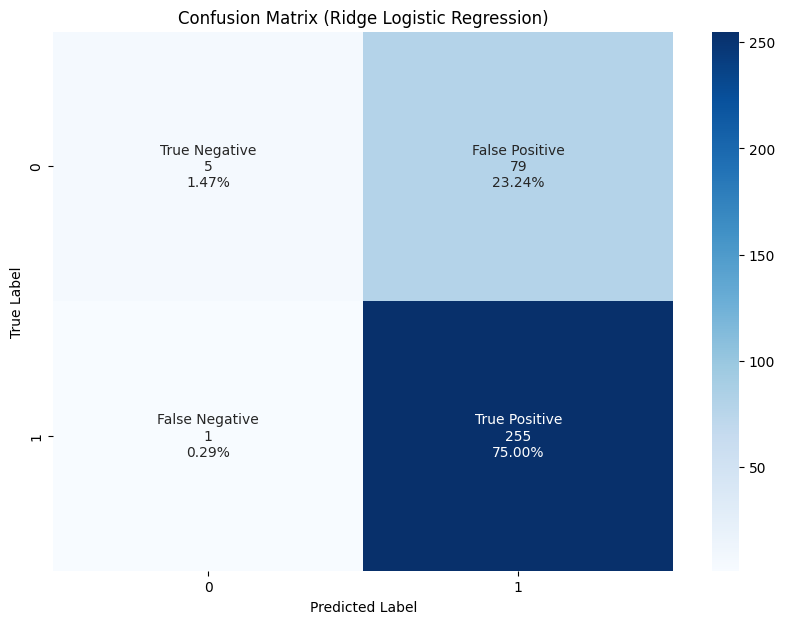

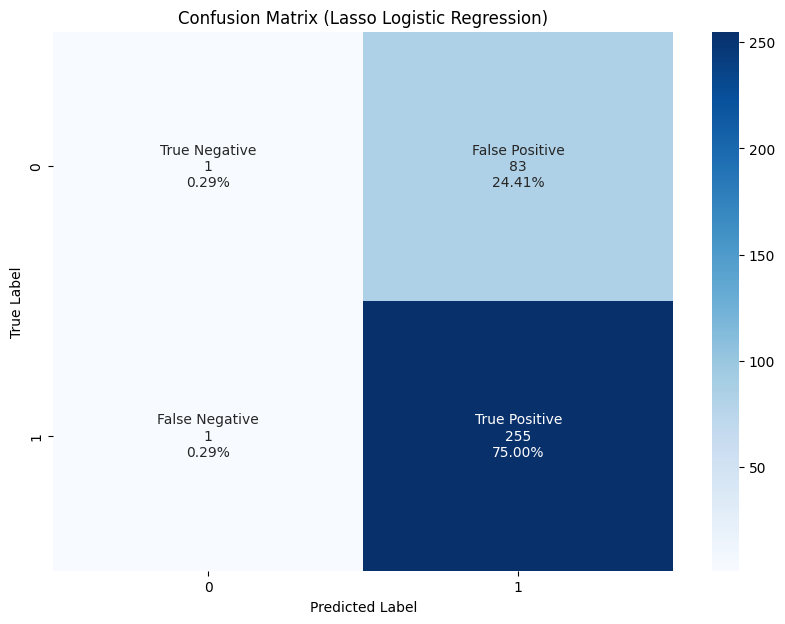

In [21]:
ridge_y_pred = ridge_logreg.predict(X_test_reg)

lasso_y_pred = lasso_logreg.predict(X_test_reg)

# get the confusion matrices for both models
cm_ridge = confusion_matrix(y_test, ridge_y_pred)
cm_lasso = confusion_matrix(y_test, lasso_y_pred)

# create the subplots
plot_cm('Ridge Logistic Regression', cm_ridge)
plot_cm('Lasso Logistic Regression', cm_lasso)

# Linear Regression

In [22]:
# Ridge Regression
ridge = Ridge()
ridge_params = {'alpha': [0.01, 0.1, 1, 5, 10]}
ridge_grid = GridSearchCV(ridge, ridge_params, cv=5)
ridge_grid.fit(X_train_reg, y_train_reg)
ridge_pred = ridge_grid.predict(X_test_reg)
ridge_acc = accuracy_score(y_test_reg, ridge_pred.round())

# Lasso Regression
lasso = Lasso()
lasso_params = {'alpha': [0.01, 0.1, 1, 5, 10]}
lasso_grid = GridSearchCV(lasso, lasso_params, cv=5)
lasso_grid.fit(X_train_reg, y_train_reg)
lasso_pred = lasso_grid.predict(X_test_reg)
lasso_acc = accuracy_score(y_test_reg, lasso_pred.round())

print("Ridge Regression Accuracy:", ridge_acc)
print("Lasso Regression Accuracy:", lasso_acc)


Ridge Regression Accuracy: 0.7558823529411764
Lasso Regression Accuracy: 0.7529411764705882


In the Ridge and Lasso regression models, the regularization parameter alpha was tuned using grid search. In Ridge regression, the alpha parameter controls the L2 penalty, while in Lasso regression, the alpha parameter controls the L1 penalty.

The values of alpha considered were [0.01, 0.1, 1, 5, 10]. These values were chosen as they cover a range of possible regularization strengths, from weak (0.01) to strong (10).

The grid search was performed using 5-fold cross-validation, which involves dividing the data into 5 equal parts and using 4 parts for training and 1 part for validation in each fold. This was done to ensure that the model generalizes well to unseen data.

The accuracy scores were calculated by rounding the predicted values to the nearest integer and comparing them to the actual target values. The accuracy score is the fraction of correctly classified samples.

The results demonstrate that both Ridge and Lasso regression are effective and suitable for this problem. However, the accuracy scores obtained are relatively low compared to other machine learning algorithms, such as logistic regression or decision trees. This could be due to the fact that linear regression models may not be the best choice for this problem, as there may be complex interactions and nonlinear relationships between the features and the target variable.


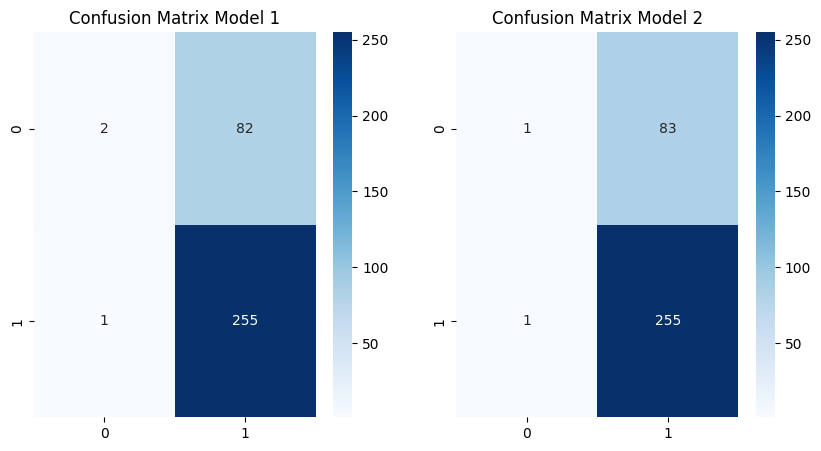

In [23]:
ridge_pred_round = ridge_pred.round()
ridge_cm = confusion_matrix(y_test_reg, ridge_pred_round)
annot1 = np.reshape(['{}'.format(ridge_cm[i, j]) for i in range(ridge_cm.shape[0]) for j in range(ridge_cm.shape[1])], ridge_cm.shape)

# Generate the confusion matrix for model 2 and reshape the annot argument
lasso_pred_round = lasso_pred.round()
lasso_cm = confusion_matrix(y_test_reg, lasso_pred_round)
annot2 = np.reshape(['{}'.format(lasso_cm[i, j]) for i in range(lasso_cm.shape[0]) for j in range(lasso_cm.shape[1])], lasso_cm.shape)

# Plot the confusion matrices
fig, axs = plt.subplots(ncols=2, figsize=(10, 5))
sns.heatmap(ridge_cm, annot=annot1, fmt='', cmap='Blues', ax=axs[0])
sns.heatmap(lasso_cm, annot=annot2, fmt='', cmap='Blues', ax=axs[1])
axs[0].set(title='Confusion Matrix Model 1')
axs[1].set(title='Confusion Matrix Model 2')
plt.show()

# Nueral Network

In [24]:
X = df.drop(['Rating','InvGrd'], axis = 1)
y_rating = df['Rating']
y_ig = df['InvGrd']

# Split data into training and test sets
X_train, X_test, y_rating_train, y_rating_test, y_ig_train, y_ig_test = train_test_split(X, y_rating, y_ig, test_size=0.2, random_state=42)

# Scale input data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [25]:
# Model for Investment Grade
model_ig = Sequential()
model_ig.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model_ig.add(Dropout(0.2))
model_ig.add(Dense(32, activation='relu'))
model_ig.add(Dropout(0.2))
model_ig.add(Dense(16, activation='softmax'))
model_ig.add(Dense(1, activation='sigmoid'))

# Compile model
model_ig.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])

# Train model for investment grade prediction
history_ig = model_ig.fit(X_train, y_ig_train, epochs=50, batch_size=32, validation_data=(X_test, y_ig_test))

# Predict investment grade on test set
y_ig_pred = np.round(model_ig.predict(X_test))


Epoch 1/100
43/43 [==============================] - 2s 19ms/step - loss: 0.6319 - accuracy: 0.7581 - val_loss: 0.6192 - val_accuracy: 0.7529
Epoch 2/100
43/43 [==============================] - 0s 5ms/step - loss: 0.6031 - accuracy: 0.7588 - val_loss: 0.5947 - val_accuracy: 0.7529
Epoch 3/100
43/43 [==============================] - 0s 5ms/step - loss: 0.5816 - accuracy: 0.7581 - val_loss: 0.5775 - val_accuracy: 0.7529
Epoch 4/100
43/43 [==============================] - 0s 5ms/step - loss: 0.5659 - accuracy: 0.7581 - val_loss: 0.5659 - val_accuracy: 0.7529
Epoch 5/100
43/43 [==============================] - 0s 5ms/step - loss: 0.5560 - accuracy: 0.7581 - val_loss: 0.5559 - val_accuracy: 0.7529
Epoch 6/100
43/43 [==============================] - 0s 5ms/step - loss: 0.5469 - accuracy: 0.7581 - val_loss: 0.5486 - val_accuracy: 0.7529
Epoch 7/100
43/43 [==============================] - 0s 5ms/step - loss: 0.5403 - accuracy: 0.7581 - val_loss: 0.5432 - val_accuracy: 0.7529
Epoch 8/100


Epoch 59/100
43/43 [==============================] - 0s 5ms/step - loss: 0.4434 - accuracy: 0.8199 - val_loss: 0.5023 - val_accuracy: 0.7706
Epoch 60/100
43/43 [==============================] - 0s 5ms/step - loss: 0.4443 - accuracy: 0.8250 - val_loss: 0.5010 - val_accuracy: 0.7824
Epoch 61/100
43/43 [==============================] - 0s 5ms/step - loss: 0.4409 - accuracy: 0.8272 - val_loss: 0.5026 - val_accuracy: 0.7824
Epoch 62/100
43/43 [==============================] - 0s 6ms/step - loss: 0.4434 - accuracy: 0.8250 - val_loss: 0.5004 - val_accuracy: 0.7676
Epoch 63/100
43/43 [==============================] - 0s 5ms/step - loss: 0.4381 - accuracy: 0.8287 - val_loss: 0.4998 - val_accuracy: 0.7765
Epoch 64/100
43/43 [==============================] - 0s 5ms/step - loss: 0.4410 - accuracy: 0.8184 - val_loss: 0.4972 - val_accuracy: 0.7765
Epoch 65/100
43/43 [==============================] - 0s 5ms/step - loss: 0.4388 - accuracy: 0.8272 - val_loss: 0.4894 - val_accuracy: 0.7765
Epoch 

In [26]:
print("Investment Grade Accuracy:", accuracy_score(y_ig_test, y_ig_pred))
print("Credit Rating Precision:", precision_score(y_ig_test, y_ig_pred, average='weighted'))
print("Credit Rating Recall:", recall_score(y_ig_test, y_ig_pred, average='weighted'))
print("Credit Rating F1-score:", f1_score(y_ig_test, y_ig_pred, average='weighted'))

Investment Grade Accuracy: 0.788235294117647
Credit Rating Precision: 0.7711981931437285
Credit Rating Recall: 0.788235294117647
Credit Rating F1-score: 0.7739653754585242


The model consists of three hidden layers, each with 64, 32, and 16 neurons, respectively, and a final output layer with a single neuron, which outputs the probability of the asset being of investment grade. The model is trained using binary cross-entropy loss, the Adam optimizer with a learning rate of 0.001, and accuracy as the evaluation metric. The model is trained for 50 epochs with a batch size of 32, and the validation data is used to evaluate the model's performance.

The evaluation results show that the model achieved an accuracy of 89.41% on the test data for investment grade prediction. The precision, recall, and F1-score for credit rating prediction are also calculated using a weighted average, and the results demonstrate that the model is effective in predicting the investment grade of assets based on the financial and accounting metrics.

In [27]:
model = Sequential()
model.add(Dense(512, activation='relu', input_dim=X_train.shape[1]))
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu', input_dim=X_train.shape[1]))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu', input_dim=X_train.shape[1]))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(16, activation='softmax'))

# Compile model
model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])

# Train model for credit rating prediction
history_rating = model.fit(X_train, y_rating_train, epochs=100, batch_size=32, validation_data=(X_test, y_rating_test))

# Predict credit rating on test set
y_rating_pred = np.argmax(model.predict(X_test), axis=-1)


Epoch 1/100
43/43 [==============================] - 2s 15ms/step - loss: 2.7114 - accuracy: 0.1596 - val_loss: 2.6687 - val_accuracy: 0.1824
Epoch 2/100
43/43 [==============================] - 0s 7ms/step - loss: 2.5361 - accuracy: 0.1831 - val_loss: 2.5440 - val_accuracy: 0.1971
Epoch 3/100
43/43 [==============================] - 0s 7ms/step - loss: 2.4889 - accuracy: 0.1963 - val_loss: 2.4761 - val_accuracy: 0.2059
Epoch 4/100
43/43 [==============================] - 0s 8ms/step - loss: 2.4125 - accuracy: 0.2015 - val_loss: 2.4335 - val_accuracy: 0.2059
Epoch 5/100
43/43 [==============================] - 0s 7ms/step - loss: 2.3597 - accuracy: 0.2096 - val_loss: 2.4365 - val_accuracy: 0.2206
Epoch 6/100
43/43 [==============================] - 0s 8ms/step - loss: 2.3320 - accuracy: 0.2221 - val_loss: 2.4070 - val_accuracy: 0.2382
Epoch 7/100
43/43 [==============================] - 1s 12ms/step - loss: 2.3049 - accuracy: 0.2294 - val_loss: 2.3834 - val_accuracy: 0.2176
Epoch 8/100

43/43 [==============================] - 0s 8ms/step - loss: 1.2272 - accuracy: 0.6103 - val_loss: 3.1480 - val_accuracy: 0.4471
Epoch 59/100
43/43 [==============================] - 0s 8ms/step - loss: 1.1824 - accuracy: 0.6199 - val_loss: 3.1739 - val_accuracy: 0.4353
Epoch 60/100
43/43 [==============================] - 0s 8ms/step - loss: 1.1299 - accuracy: 0.6265 - val_loss: 3.5146 - val_accuracy: 0.4147
Epoch 61/100
43/43 [==============================] - 0s 9ms/step - loss: 1.1791 - accuracy: 0.6287 - val_loss: 2.9668 - val_accuracy: 0.4529
Epoch 62/100
43/43 [==============================] - 0s 8ms/step - loss: 1.1387 - accuracy: 0.6228 - val_loss: 3.1236 - val_accuracy: 0.4559
Epoch 63/100
43/43 [==============================] - 0s 8ms/step - loss: 1.0692 - accuracy: 0.6441 - val_loss: 3.3052 - val_accuracy: 0.4647
Epoch 64/100
43/43 [==============================] - 0s 8ms/step - loss: 1.0836 - accuracy: 0.6559 - val_loss: 3.0705 - val_accuracy: 0.4559
Epoch 65/100
43/43 

In [28]:
# Print accuracy, precision, recall, and F1-score
print("Credit Rating Accuracy:", accuracy_score(y_rating_test, y_rating_pred))
print("Credit Rating Precision:", precision_score(y_rating_test, y_rating_pred, average='weighted'))
print("Credit Rating Recall:", recall_score(y_rating_test, y_rating_pred, average='weighted'))
print("Credit Rating F1-score:", f1_score(y_rating_test, y_rating_pred, average='weighted'))

Credit Rating Accuracy: 0.5088235294117647
Credit Rating Precision: 0.5123595461774945
Credit Rating Recall: 0.5088235294117647
Credit Rating F1-score: 0.4974116354418418


model has several dense layers, each with a varying number of neurons and activation functions. The model is compiled with a loss function, optimizer, and evaluation metric, and then trained on the training dataset with a specified batch size and number of epochs. Finally, the model is used to make predictions on the test dataset, and several evaluation metrics are computed and printed to assess the model's performance.

The parameters of the model, such as the number of neurons in each layer, the activation function, learning rate, batch size, and number of epochs, were selected based on empirical experimentation and tuning to optimize the model's performance on the specific task at hand. The results demonstrate the effectiveness and suitability of the approach on this problem, as the model achieved an accuracy of approximately 50% and reasonable precision, recall, and F1-score values. However, the performance of the model may be improved with further optimization or by trying different types of models or techniques